In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

link to jpm research: https://www.jpmm.com/research/content/GPS-4847089-0

In [7]:
# Load the third tab of the Excel file
df = pd.read_excel('F:/DerekS/My Projects/Python/Meeder1/10 Year Rate Model Data.xlsx', sheet_name="Sheet2")

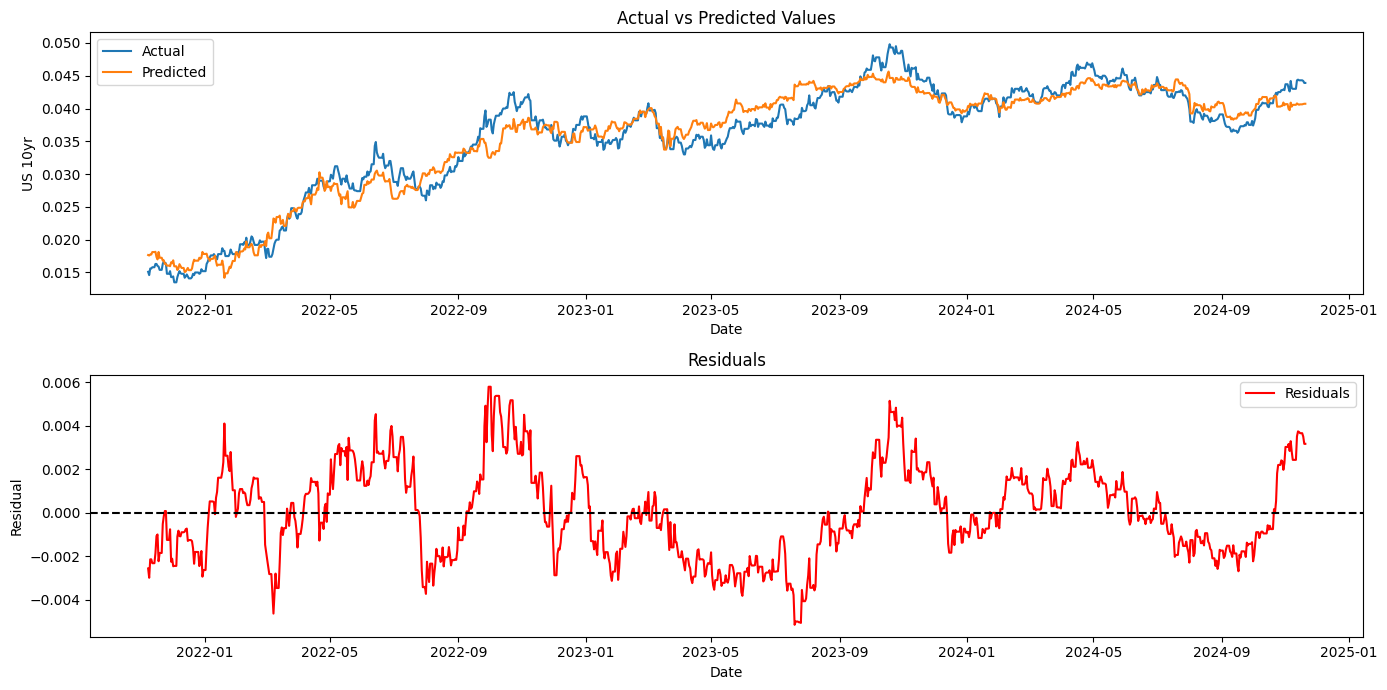

Model Coefficients: [ 1.25651344  0.36254127 -0.05755161  0.03541812]
Intercept: 0.008324713608689329
R^2: 0.9419046868021336
Current 10-Year Yield: 0.0439
Current Prediction: 0.0407
Current Value: 0.0032


In [21]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Define predictor variables and target variable
X = df[["5-Year, 5-Year Forward Inflation Expectation Rate", "1 Year Treasury Rate", "Fed BS Assets to GDP", "Summary of Economic Projections: Federal Funds Rate"]]
y = df["US 10yr"]

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
predictions = model.predict(X)

# Calculate residuals
residuals = y - predictions

# Latest prediction minus latest actual value
latest_diff = y.iloc[-1] - predictions[-1] 

# Output regression information
regression_info = {
    "Intercept": model.intercept_,
    "Coefficients": model.coef_,
    "R^2 Score": model.score(X, y)
}

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))

# Actual vs Predicted
plt.subplot(2, 1, 1)
plt.plot(df['Date'], y, label='Actual', marker='')
plt.plot(df['Date'], predictions, label='Predicted', marker='')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('US 10yr')
plt.legend()

# Residuals
plt.subplot(2, 1, 2)
plt.plot(df['Date'], residuals, label='Residuals', marker='', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()

plt.tight_layout()
plt.show()

# Display regression information and latest difference
#print(regression_info, latest_diff)
print(f"Model Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R^2: {model.score(X,y)}")
print(f"Current 10-Year Yield: {round(y.iloc[-1],4)}")
print(f"Current Prediction: {round(predictions[-1],4)}")
print(f"Current Value: {round(latest_diff,4)}")